In [2]:
import pandas as pd

# Example DataFrame creation (replace this with your actual data loading)
data = pd.read_csv('C:\\Users\\ramee\\OneDrive\\Desktop\\cvss202223\\data\\cve_2022-2023_complete_dataset.csv')

# Drop rows where 'Description' is null
data = data.dropna(subset=['Description'])

# Optional: Reset the index after dropping rows
data = data.reset_index(drop=True)

# Save the cleaned DataFrame back to CSV (if needed)
data.to_csv('C:\\Users\\ramee\\OneDrive\\Desktop\\cvss202223\\data\\cleaned_dataset.csv', index=False)

# Print the info to verify
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45676 entries, 0 to 45675
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   publishedDate                 45676 non-null  object 
 1   lastModifiedDate              45676 non-null  object 
 2   CVE_ID                        45676 non-null  object 
 3   cvssV3_version                45676 non-null  float64
 4   cvssV3_vectorString           45676 non-null  object 
 5   cvssV3_attackVector           45676 non-null  object 
 6   cvssV3_attackComplexity       45676 non-null  object 
 7   cvssV3_privilegesRequired     45676 non-null  object 
 8   cvssV3_userInteraction        45676 non-null  object 
 9   cvssV3_scope                  45676 non-null  object 
 10  cvssV3_confidentialityImpact  45676 non-null  object 
 11  cvssV3_integrityImpact        45676 non-null  object 
 12  cvssV3_availabilityImpact     45676 non-null  object 
 13  c

In [3]:
for col_name in list(data.columns.values[5:13]):
    print(col_name)
    print( data[col_name].value_counts(dropna=False) )
    
print('cvssV3_baseSeverity')
print( data['cvssV3_baseSeverity'].value_counts(dropna=False) )

cvssV3_attackVector
NETWORK             34206
LOCAL               10294
ADJACENT_NETWORK      771
PHYSICAL              405
Name: cvssV3_attackVector, dtype: int64
cvssV3_attackComplexity
LOW     44217
HIGH     1459
Name: cvssV3_attackComplexity, dtype: int64
cvssV3_privilegesRequired
NONE    25681
LOW     15097
HIGH     4898
Name: cvssV3_privilegesRequired, dtype: int64
cvssV3_userInteraction
NONE        30517
REQUIRED    15159
Name: cvssV3_userInteraction, dtype: int64
cvssV3_scope
UNCHANGED    36964
CHANGED       8712
Name: cvssV3_scope, dtype: int64
cvssV3_confidentialityImpact
HIGH    26073
LOW     10258
NONE     9345
Name: cvssV3_confidentialityImpact, dtype: int64
cvssV3_integrityImpact
HIGH    22086
NONE    13493
LOW     10097
Name: cvssV3_integrityImpact, dtype: int64
cvssV3_availabilityImpact
HIGH    25736
NONE    19162
LOW       778
Name: cvssV3_availabilityImpact, dtype: int64
cvssV3_baseSeverity
MEDIUM      19881
HIGH        17506
CRITICAL     7535
LOW           754
Name: 

In [6]:
import numpy as np
pd.set_option('display.max_colwidth', None)
print(data.loc[data['Description'].str.split().apply(len) < 10]['Description'].shape)
desc_len = data['Description'].str.split().apply(len)


def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

desc_len_sorted, samples = ecdf(desc_len)
print(np.percentile(desc_len_sorted, 2))
print("5%:", np.percentile(desc_len_sorted, 5), "10%:", np.percentile(desc_len_sorted, 10), "25%:", np.percentile(desc_len_sorted, 25),"50%:", np.percentile(desc_len_sorted, 50), " 75%:", np.percentile(desc_len_sorted, 75), " 90%:", np.percentile(desc_len_sorted, 90), " 95%:", np.percentile(desc_len_sorted, 95))

(785,)
10.0
5%: 12.0 10%: 15.0 25%: 21.0 50%: 34.0  75%: 53.0  90%: 79.0  95%: 101.0


In [7]:
print("2%:", np.percentile(desc_len_sorted, 2))

from scipy import stats

print("percentile of 10: ", stats.percentileofscore(desc_len_sorted, 10))
print("percentile of 128: ", stats.percentileofscore(desc_len_sorted, 128))

2%: 10.0
percentile of 10:  2.330545581924862
percentile of 128:  97.16043436377967


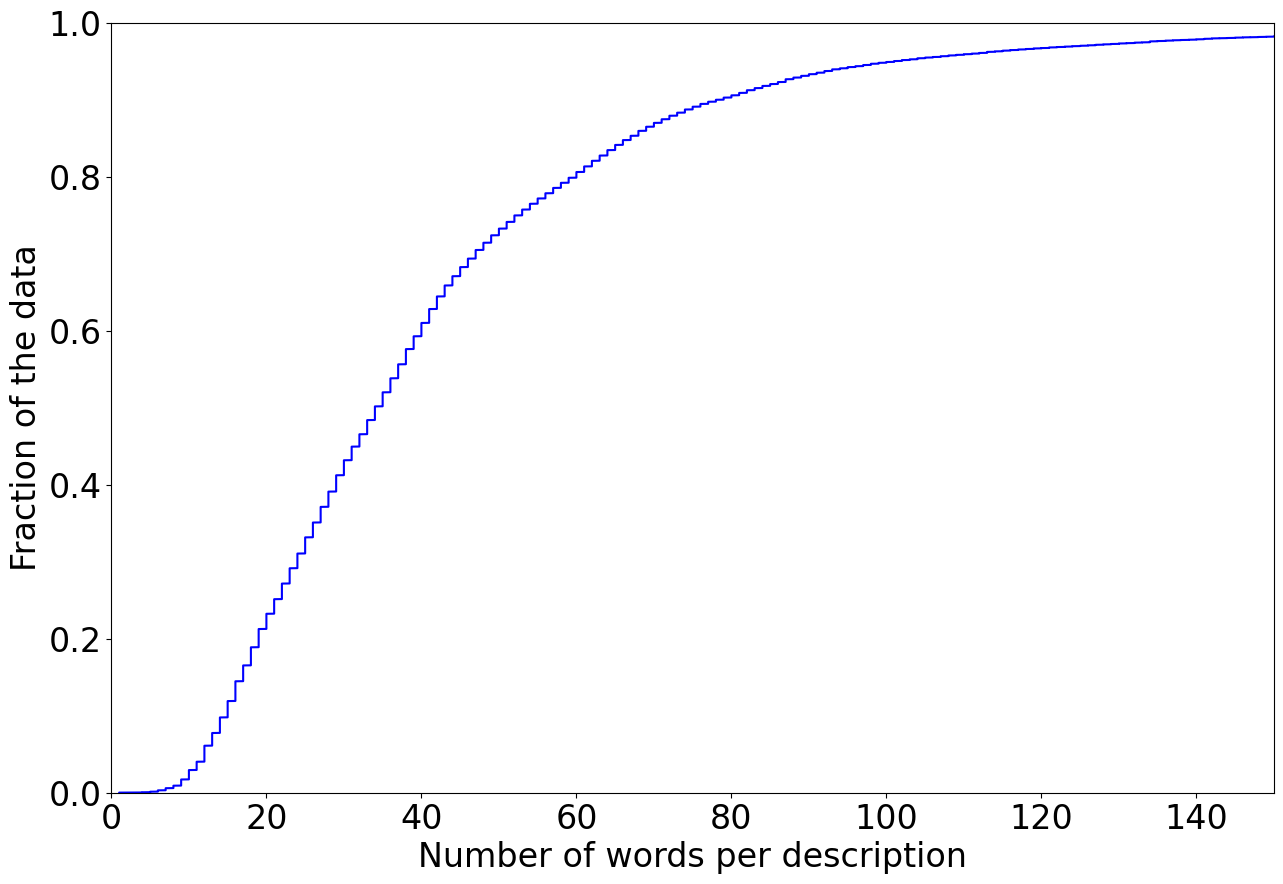

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.plot(desc_len_sorted[:], samples[:], color='blue')
#plt.hlines(0.9, 0, 42, colors='r', linestyles='solid')
#plt.vlines(42, 0, 0.9, colors='r', linestyles='solid')
plt.axis([0, 150, 0, 1])
plt.xlabel('Number of words per description', fontsize=24)
plt.ylabel('Fraction of the data', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=24)
#plt.savefig('', bbox_inches = 'tight')
plt.show()

In [9]:
pd.set_option('display.max_colwidth', None)

#discard samples with a "Description" field containing less than 10 words

#long_enough_description = data.loc[data['Description'].str.split().apply(len) >= 10]
#long_enough_description.reset_index(drop=True, inplace=True)
#long_enough_description.info()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45676 entries, 0 to 45675
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   publishedDate                 45676 non-null  object 
 1   lastModifiedDate              45676 non-null  object 
 2   CVE_ID                        45676 non-null  object 
 3   cvssV3_version                45676 non-null  float64
 4   cvssV3_vectorString           45676 non-null  object 
 5   cvssV3_attackVector           45676 non-null  object 
 6   cvssV3_attackComplexity       45676 non-null  object 
 7   cvssV3_privilegesRequired     45676 non-null  object 
 8   cvssV3_userInteraction        45676 non-null  object 
 9   cvssV3_scope                  45676 non-null  object 
 10  cvssV3_confidentialityImpact  45676 non-null  object 
 11  cvssV3_integrityImpact        45676 non-null  object 
 12  cvssV3_availabilityImpact     45676 non-null  object 
 13  c

In [12]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, [2, 20]]
y = data.iloc[:, np.arange(4, 20)]
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y['cvssV3_baseSeverity'])

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(45676, 2)
(45676, 16)
(36540, 2)
(9136, 2)
(36540, 16)
(9136, 16)


In [13]:
print(y_train['cvssV3_baseSeverity'].value_counts(dropna=False) / y_train.shape[0])
print(y_test['cvssV3_baseSeverity'].value_counts(dropna=False) / y_test.shape[0])

MEDIUM      0.435249
HIGH        0.383279
CRITICAL    0.164970
LOW         0.016502
Name: cvssV3_baseSeverity, dtype: float64
MEDIUM      0.435311
HIGH        0.383209
CRITICAL    0.164952
LOW         0.016528
Name: cvssV3_baseSeverity, dtype: float64


In [13]:
X_train.to_csv('C:\\Users\\ramee\\OneDrive\\Desktop\\amal new data\\data\\cve_2022-2023_X_train.csv', index=False)
y_train.to_csv('C:\\Users\\ramee\\OneDrive\\Desktop\\amal new data\\data\\cve_2022-2023_y_train.csv', index=False)

X_test.to_csv('C:\\Users\\ramee\\OneDrive\\Desktop\\amal new data\\data\\cve_2022-2023_X_test.csv', index=False)
y_test.to_csv('C:\\Users\\ramee\\OneDrive\\Desktop\\amal new data\\data\\cve_2022-2023_y_test.csv', index=False)

In [14]:
import pandas as pd

X_train = pd.read_csv('C:\\Users\\ramee\\OneDrive\\Desktop\\amal new data\\data\\cve_2022-2023_X_train.csv')
y_train = pd.read_csv('C:\\Users\\ramee\\OneDrive\\Desktop\\amal new data\\data\\cve_2022-2023_y_train.csv')

X_test = pd.read_csv('C:\\Users\\ramee\\OneDrive\\Desktop\\amal new data\\data\\cve_2022-2023_X_test.csv')
y_test = pd.read_csv('C:\\Users\\ramee\\OneDrive\\Desktop\\amal new data\\data\\cve_2022-2023_y_test.csv')

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(y_train['cvssV3_baseSeverity'].value_counts(dropna=False) / y_train.shape[0])
print(y_test['cvssV3_baseSeverity'].value_counts(dropna=False) / y_test.shape[0])

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ramee\\OneDrive\\Desktop\\amal new data\\data\\cve_2022-2023_X_train.csv'

In [ ]:
y_train.info()

In [ ]:
for col_name in list(y_train.columns.values[1:11]):
    print("-----------------", col_name, "------------------------")
    print( y_train[col_name].value_counts(dropna=False) )
    print( y_test[col_name].value_counts(dropna=False) )
    
#print('cvssV3_baseSeverity')
#print( y_train['cvssV3_baseSeverity'].value_counts(dropna=False) )